In [7]:
import random
import numpy as np

import initialization
import evaluation
import parent_selection
import crossover
import survivor_selection
import environment
import mutation

In [8]:
class BinsEA:

    def __init__(self, training=None, bin_info=environment.BinInfo('../datasets/BinLocations.csv', '../datasets/BinDistances.csv'), pop_size=24, mating_pool_size=8, tournament_size=4, crossover_rate=0, mut_rate=0.3, max_gen=1000, target=25, rng=True):
        self.bin_info=bin_info
        self.training=training
        self.pop_size=pop_size
        self.mating_pool_size=mating_pool_size
        self.tournament_size=tournament_size
        self.crossover_rate=crossover_rate
        self.mut_rate=mut_rate
        self.max_gen=max_gen
        self.target=target
        if(rng == False):
            random.seed()

    def main(self):

        bin_count = len(self.bin_info.bins)
        avg_dist = []

        # Initialization
        population = initialization.pop_init(self.pop_size, self.bin_info, bin_count)
        fitness = [] # Fitness ranges from 0 to bin_count
        for i in population:
            fitness.append(evaluation.fitness(i, self.bin_info))
        gen = 0
        og_fitness = fitness.copy()
        # Main Evolutionary Loop
        while (gen < self.max_gen and max(fitness) < self.target):

            parents = parent_selection.tournament_select(population, fitness, self.mating_pool_size, self.tournament_size)
            random.shuffle(parents)
            offspring = []
            offspring_fitness = []
            
            i=0
            while len(offspring) < self.mating_pool_size:
                # Generates 2 new offspring using PMX
                off = crossover.crossover_main(population[parents[i]], population[parents[i+1]], self.crossover_rate)
                # Performs inversion mutation on offspring
                off1 = mutation.inv_mut(off[0],self.mut_rate)
                off2 = mutation.inv_mut(off[1],self.mut_rate)
                offspring.append(off1)
                offspring.append(off2)
                offspring_fitness.append(evaluation.fitness(off1,self.bin_info))
                offspring_fitness.append(evaluation.fitness(off2,self.bin_info))
                i += 2
            population, fitness = survivor_selection.mu_plus_lambda(population, fitness, offspring, offspring_fitness)
            print("gen: ",gen," - max fit: ",max(fitness)," - pop size: ", len(population))
            avg_dist.append(len(population[0]) / (sum(fitness)/len(fitness)))
            gen += 1

        return population, fitness, og_fitness, gen, avg_dist

In [9]:
bin_info = environment.BinInfo('../datasets/BinLocations.csv', '../datasets/BinDistances.csv')
pop_size = 200
mating_pool_size = 60 # Must be even
tournament_size = 40
crossover_rate = 0
mut_rate = 0.6
max_gen = 100000
target_fitness = 3

gen_count = 0
model = BinsEA(bin_info.bins, bin_info, pop_size, mating_pool_size, tournament_size, crossover_rate, mut_rate, max_gen, target_fitness, True)
population, fitness, fitness_o, gen_count, avg_dist = model.main()
route = population[fitness.index(max(fitness))]

gen:  0  - max fit:  1.0727534617900536  - pop size:  200
gen:  1  - max fit:  1.0727534617900536  - pop size:  200
gen:  2  - max fit:  1.0786751683046654  - pop size:  200
gen:  3  - max fit:  1.0786751683046654  - pop size:  200
gen:  4  - max fit:  1.0792526211475817  - pop size:  200
gen:  5  - max fit:  1.0792526211475817  - pop size:  200
gen:  6  - max fit:  1.0792526211475817  - pop size:  200
gen:  7  - max fit:  1.0800787599756863  - pop size:  200
gen:  8  - max fit:  1.0814212404515329  - pop size:  200
gen:  9  - max fit:  1.0814212404515329  - pop size:  200
gen:  10  - max fit:  1.0814212404515329  - pop size:  200
gen:  11  - max fit:  1.081624214083596  - pop size:  200
gen:  12  - max fit:  1.0830501466744669  - pop size:  200
gen:  13  - max fit:  1.0842522430449635  - pop size:  200
gen:  14  - max fit:  1.0842522430449635  - pop size:  200
gen:  15  - max fit:  1.0845994302668933  - pop size:  200
gen:  16  - max fit:  1.0845994302668933  - pop size:  200
gen:  17

#### Evolutionary Algorithm Summary

Best Individual: [200, 95, 199, 142, 19, 265, 193, 282, 261, 286, 264, 309, 297, 269, 284, 310, 194, 138, 157, 132, 144, 162, 279, 164, 159, 322, 357, 343, 378, 336, 351, 314, 359, 270, 149, 172, 187, 168, 153, 141, 154, 99, 135, 137, 180, 220, 203, 242, 268, 195, 167, 296, 128, 48, 45, 7, 27, 16, 30, 84, 58, 53, 89, 39, 56, 64, 335, 372, 397, 373, 125, 393, 395, 325, 383, 369, 215, 120, 131, 190, 126, 98, 301, 259, 234, 349, 347, 238, 260, 88, 5, 35, 54, 205, 23, 46, 14, 155, 108, 181, 377, 389, 341, 390, 392, 360, 312, 321, 365, 354, 366, 51, 36, 179, 156, 57, 186, 90, 103, 184, 158, 189, 119, 17, 77, 177, 143, 163, 94, 152, 112, 92, 311, 37, 86, 61, 20, 34, 13, 33, 42, 15, 29, 87, 2, 24, 305, 292, 380, 367, 345, 318, 317, 396, 235, 249, 240, 233, 68, 6, 130, 49, 174, 161, 109, 221, 250, 229, 217, 226, 241, 211, 248, 188, 104, 183, 134, 96, 22, 71, 59, 73, 79, 60, 32, 50, 76, 324, 139, 40, 10, 47, 3, 83, 12, 78, 18, 287, 280, 306, 224, 62, 74, 376, 331, 239, 243, 228, 222, 225, 236, 

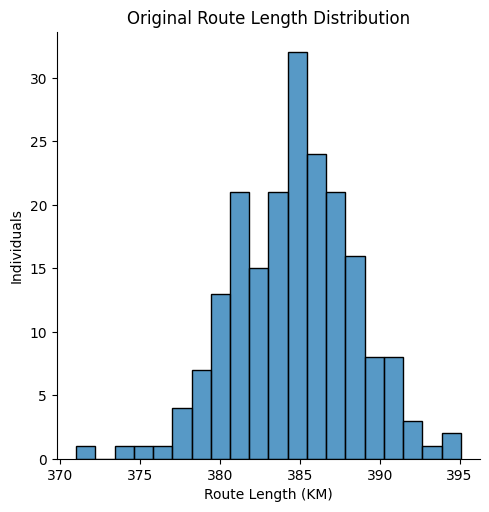

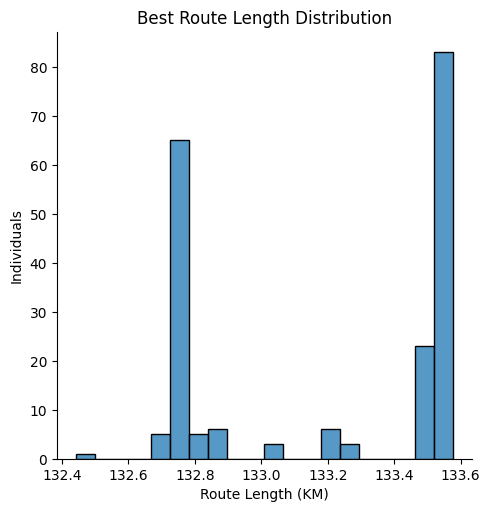

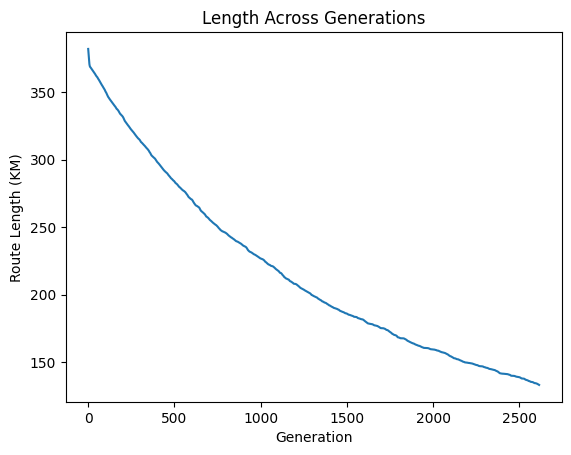

In [10]:
import seaborn as sb
import pandas as pd
import matplotlib.pyplot as plt

print("Best Individual:", route)
print("Best Fitness:", evaluation.fitness(route, bin_info), "    Target Fitness:", target_fitness)
print("Best Route Length:", round(len(route)/evaluation.fitness(route, bin_info),2),"KM\n")

fitness_increase = ((sum(fitness) - sum(fitness_o)) / sum(fitness_o))/gen_count
print("Average Improvement Per Generation:",round(fitness_increase*100,2),"% Fitness Increase")
print("Generations to Terminate:", gen_count)
print("Max Generations Allowed", max_gen, "\n")

count = 0
for i in range(len(route)-1):
    if(bin_info.get_dist(route[i], route[i+1]) == 1):
        count += 1
print("\'Bad\' Paths:", count)

len_map = pd.DataFrame({"Route Length": [len(route)/f for f in fitness]})
len_map_o = pd.DataFrame({"Route Length": [len(route)/f for f in fitness_o]})
dist_map = pd.DataFrame({"length": avg_dist})

plt1=sb.displot(len_map_o,x="Route Length",bins=20).set(title="Original Route Length Distribution", xlabel='Route Length (KM)', ylabel="Individuals")
plt.show()
plt2=sb.displot(len_map,x="Route Length",bins=20).set(title="Best Route Length Distribution", xlabel='Route Length (KM)', ylabel="Individuals")
plt.show()
plt3=sb.lineplot(x=dist_map.index, y='length', data=dist_map).set(title="Length Across Generations", xlabel='Generation', ylabel="Route Length (KM)")
plt.show()

#### SHAP Results

In [11]:
import shap

"""
bin_data = pd.DataFrame(bin_info.bins, columns=bin_info.headers)
print(bin_info.headers)
X = np.asarray(bin_info.bins)
X = X[:,-2:]
explainer = shap.PermutationExplainer(route,X)
shap_vals = explainer(X[:100])
shap.summary_plot(shap_values=shap_vals, features=route, plot_type='bar')
"""

IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html


"\nbin_data = pd.DataFrame(bin_info.bins, columns=bin_info.headers)\nprint(bin_info.headers)\nX = np.asarray(bin_info.bins)\nX = X[:,-2:]\nexplainer = shap.PermutationExplainer(route,X)\nshap_vals = explainer(X[:100])\nshap.summary_plot(shap_values=shap_vals, features=route, plot_type='bar')\n"

#### DiCE Results

In [12]:
import dice_ml
from dice_ml.utils import helpers
import copy

# DiCE Test
import sklearn.linear_model as lm
from sklearn.model_selection import train_test_split

dataset = helpers.load_adult_income_dataset()

target = dataset["income"]
train, test, _, _ = train_test_split(dataset, target, test_size=0.2, random_state=0, stratify=target)

print(train)

d = dice_ml.Data(dataframe=train, continuous_features=['age', 'hours_per_week'], outcome_name='income')
m = dice_ml.Model(model_path=helpers.get_adult_income_modelpath(), backend='TF2', func='ohe-min-max')
exp = dice_ml.Dice(d,m)

query_instance = test.drop(columns="income")[0:1]

dice_exp = exp.generate_counterfactuals(query_instance, 4, "opposite")
dice_exp.visualize_as_dataframe()


dataset = copy.deepcopy(bin_info.bins)
for row in range(len(dataset)):
    dataset[row].append(route.index(row))
cols = copy.deepcopy(bin_info.headers)
cols.append("route_pos")
bin_data = pd.DataFrame(dataset, columns=cols)

target = bin_data["route_pos"]
train, test, _, _ = train_test_split(bin_data, target, test_size=0.2, random_state=0)


d = dice_ml.Data(dataframe=train, continuous_features=['point_latitude', 'point_longitude'], outcome_name='route_pos')
m = dice_ml.Model(model=BinsEA, backend='TF2', func='ohe-min-max')
exp = dice_ml.Dice(d,m)

query_instance = test.drop(columns="route_pos")[0:1]

dice_exp = exp.generate_counterfactuals(query_instance, 4, "opposite")
dice_exp.visualize_as_dataframe()

       age      workclass     education marital_status     occupation   race  \
20907   38        Private       HS-grad        Married    Blue-Collar  White   
2573    54  Other/Unknown  Some-college        Married  Other/Unknown  Other   
10939   31        Private  Some-college       Divorced    Blue-Collar  White   
7839    41        Private   Prof-school        Married   White-Collar  Other   
9608    27        Private        School         Single    Blue-Collar  White   
...    ...            ...           ...            ...            ...    ...   
25388   52     Government       HS-grad        Married        Service  Other   
6214    39  Self-Employed  Some-college        Married    Blue-Collar  White   
6749    44  Self-Employed       HS-grad        Married    Blue-Collar  White   
17884   23        Private  Some-college      Separated          Sales  White   
6862    44        Private        School       Divorced   White-Collar  White   

       gender  hours_per_week  income  

100%|██████████| 1/1 [00:01<00:00,  1.17s/it]

Query instance (original outcome : 0)


,age,workclass,education,marital_status,occupation,race,gender,hours_per_week,income
0,29,Private,HS-grad,Married,Blue-Collar,White,Female,38,0



Diverse Counterfactual set (new outcome: 1)


,age,workclass,education,marital_status,occupation,race,gender,hours_per_week,income
0,52,Private,HS-grad,Married,White-Collar,White,Female,38,1
1,85,Private,Prof-school,Married,Blue-Collar,White,Female,38,1
2,29,Private,HS-grad,Married,Blue-Collar,White,Female,88,1
3,29,Self-Employed,HS-grad,Married,Other/Unknown,White,Female,38,1


  0%|          | 0/1 [00:00<?, ?it/s]


TypeError: BinsEA.__init__() got multiple values for argument 'training'

#### ALE Results

In [13]:
from alibi.explainers import ALE
ale = ALE()
exp = ALE.explain(X=bin_data)

TypeError: ALE.__init__() missing 1 required positional argument: 'predictor'